In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 27.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's d

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel, pauli_error
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2024-10-08 10:31:33,849: Default instance: ibm-q/open/main


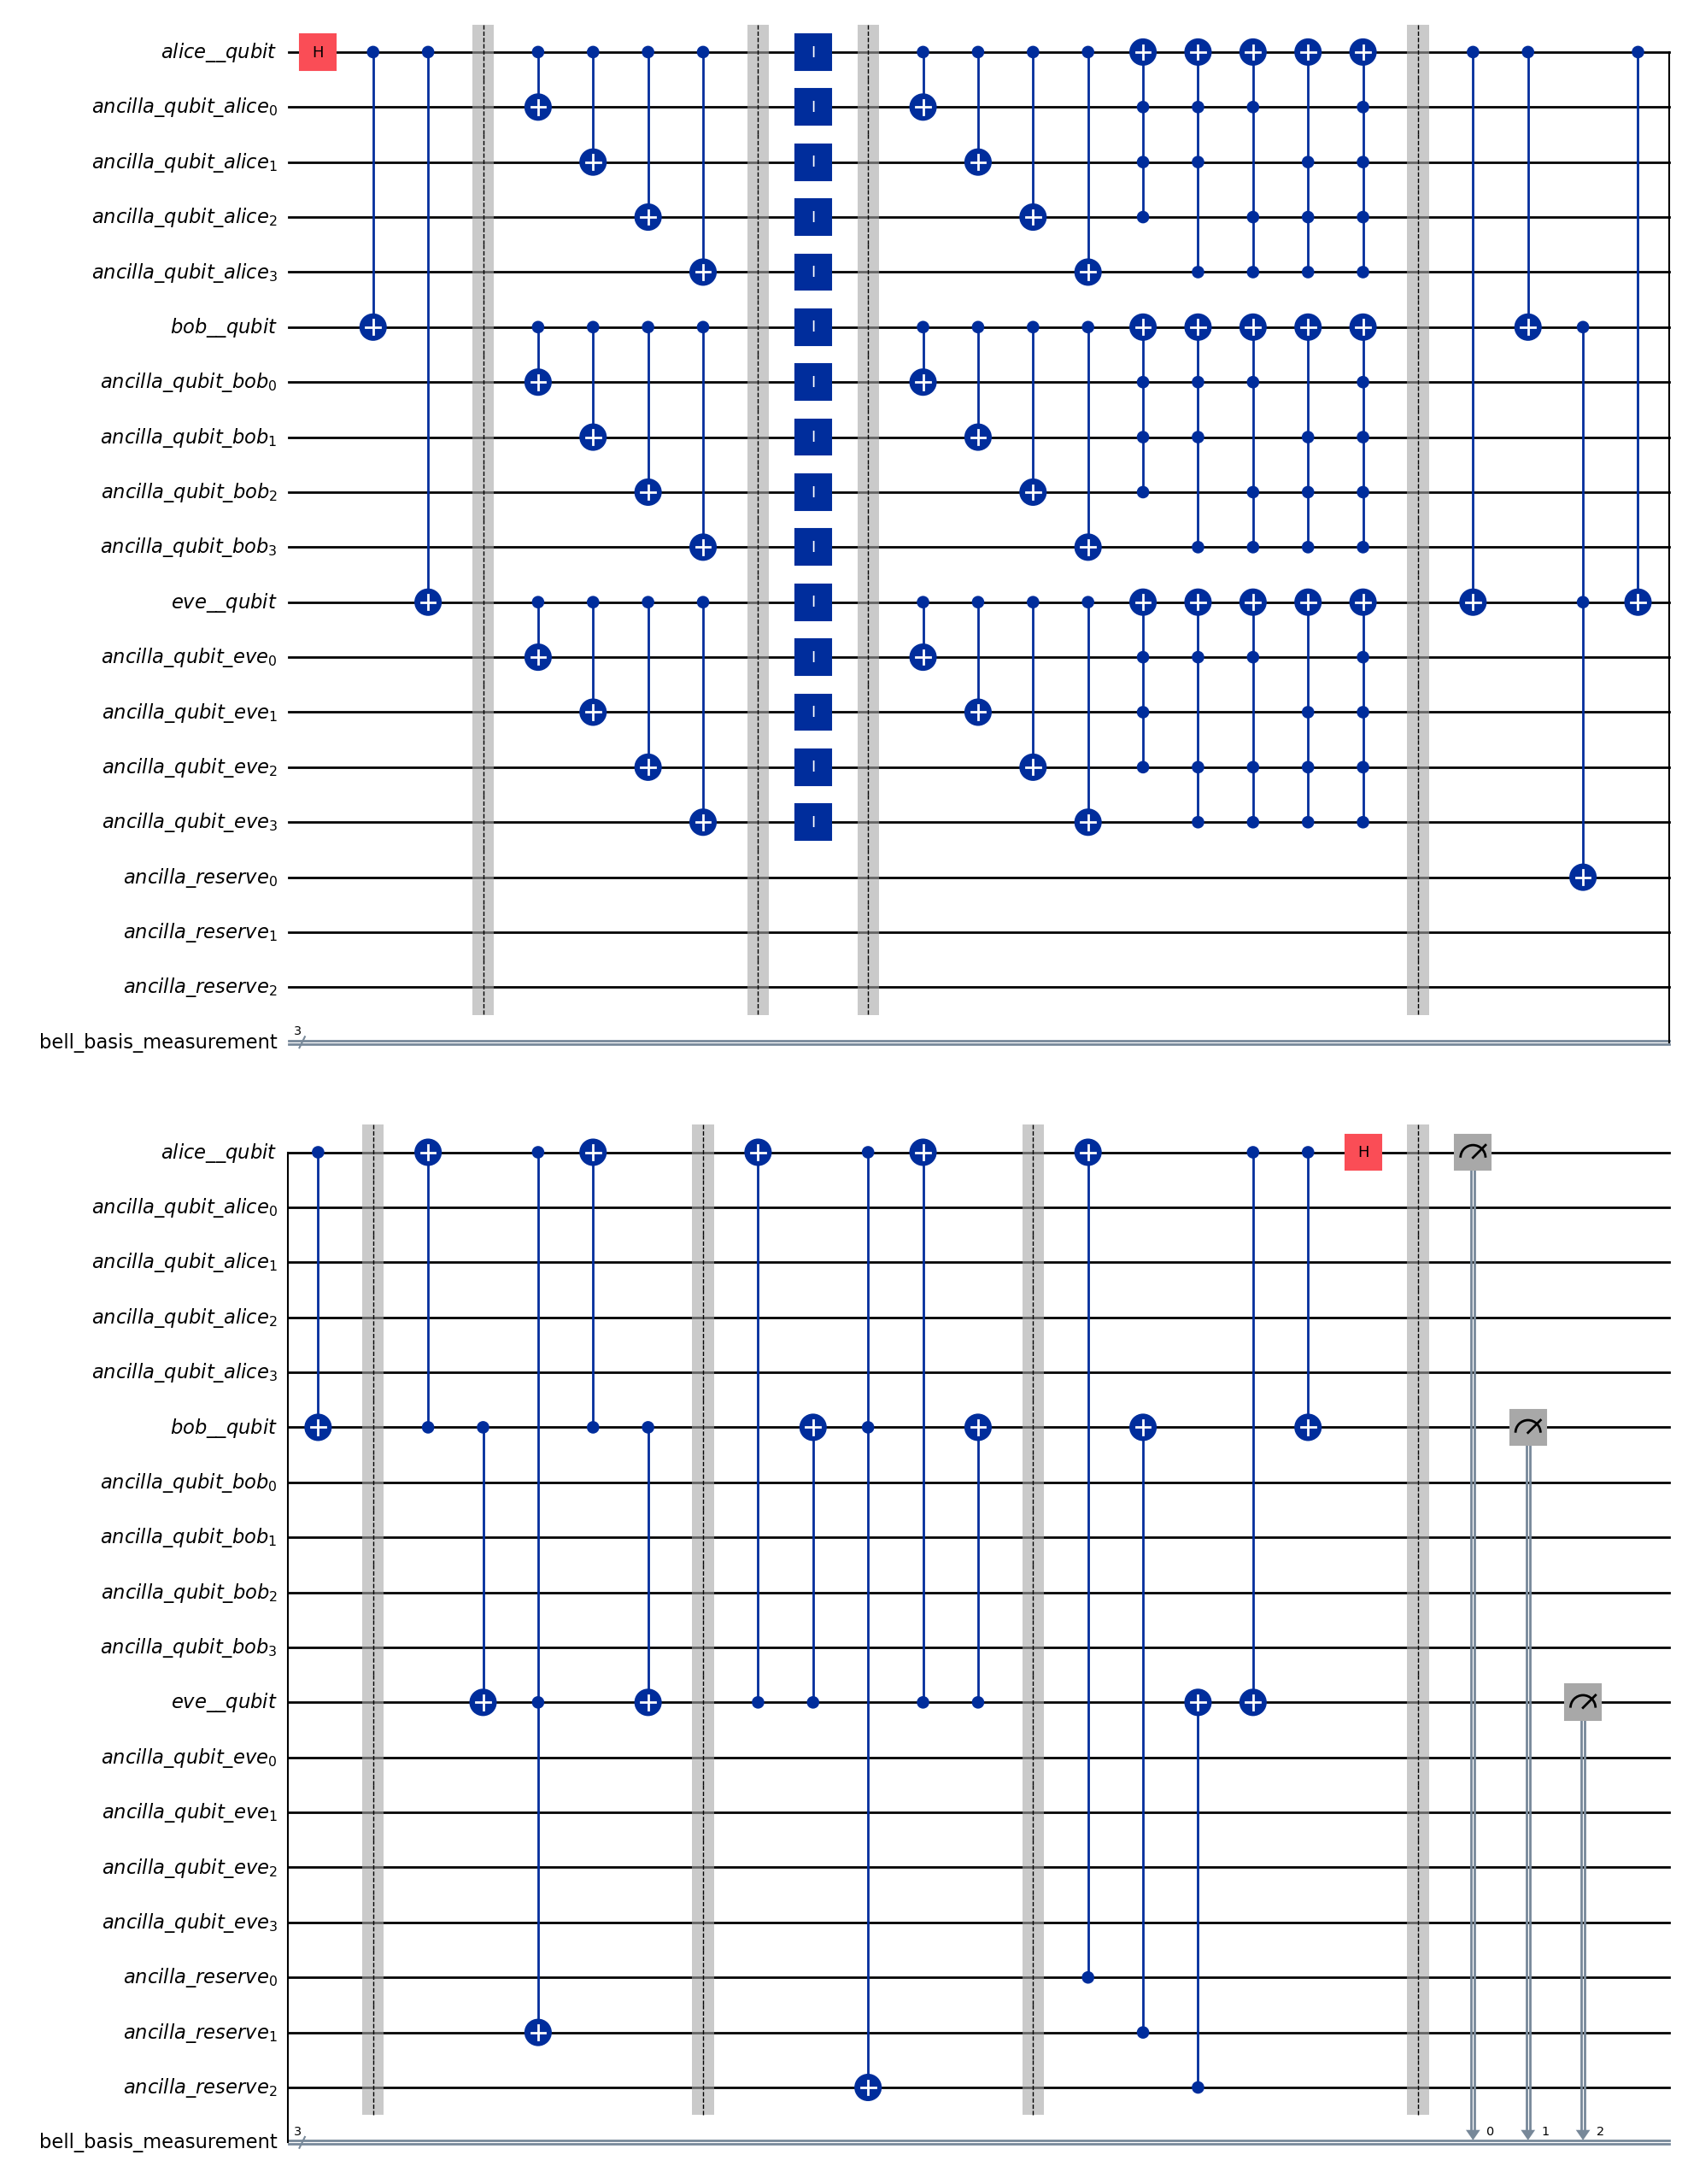

In [3]:
cr= ClassicalRegister(3,"bell_basis_measurement")
alice= QuantumRegister(1, 'alice__qubit')
bob= QuantumRegister(1, 'bob__qubit')
eve= QuantumRegister(1, 'eve__qubit')
aq1= QuantumRegister(4, 'ancilla_qubit_alice')
aq2= QuantumRegister(4,'ancilla_qubit_bob')
aq3= QuantumRegister(4,'ancilla_qubit_eve')
aq4= QuantumRegister(3,'ancilla_reserve')

repetition5 = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,aq4,cr)

repetition5.h(alice)
repetition5.cx(alice,bob)
repetition5.cx(alice,eve)

repetition5.barrier()
repetition5.cx(alice, aq1)
repetition5.cx(bob, aq2)
repetition5.cx(eve, aq3)

repetition5.barrier()

repetition5.id(range(repetition5.num_qubits-3))
repetition5.barrier()

repetition5.cx(alice, aq1)
repetition5.cx(bob, aq2)
repetition5.cx(eve, aq3)

repetition5.mcx([1,2,3],0)
repetition5.mcx([1,2,4],0)
repetition5.mcx([1,3,4],0)
repetition5.mcx([2,3,4],0)
repetition5.mcx([1,2,3,4],0)
repetition5.mcx([6,7,8],5)
repetition5.mcx([6,7,9],5)
repetition5.mcx([6,8,9],5)
repetition5.mcx([7,8,9],5)
repetition5.mcx([6,7,8,9],5)
repetition5.mcx([11,12,13],10)
repetition5.mcx([11,13,14],10)
repetition5.mcx([11,13,14],10)
repetition5.mcx([12,13,14],10)
repetition5.mcx([11,12,13,14],10)
repetition5.barrier()

repetition5.cx(alice,eve)
repetition5.cx(alice,bob)
repetition5.ccx(bob, eve, aq4[0])
repetition5.cx(alice,eve)
repetition5.cx(alice,bob)
repetition5.barrier()

repetition5.cx(bob,alice)
repetition5.cx(bob,eve)
repetition5.ccx(alice, eve, aq4[1])
repetition5.cx(bob,alice)
repetition5.cx(bob,eve)
repetition5.barrier()

repetition5.cx(eve,alice)
repetition5.cx(eve,bob)
repetition5.ccx(alice, bob, aq4[2])
repetition5.cx(eve,alice)
repetition5.cx(eve,bob)
repetition5.barrier()


repetition5.cx(aq4[0],alice)
repetition5.cx(aq4[1],bob)
repetition5.cx(aq4[2],eve)
repetition5.cx(alice,eve)
repetition5.cx(alice,bob)
repetition5.h(alice)
repetition5.barrier()

repetition5.measure([alice[0], bob[0], eve[0]],cr)
repetition5.draw(output='mpl')

In [7]:
# Range of noise levels for one-qubit gates
noise_prob = np.linspace(0,1,30)
# params = 4*noise_prob/3
fidelities = []

for rate in noise_prob:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    bit_flip_error = pauli_error([('X',rate), ('I', 1-rate)])
    
    noise_model.add_all_qubit_quantum_error(bit_flip_error, 'id')
    
    simulator = simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(repetition5, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['000']
    fidelities.append(fidelity)

{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}
{'000': 300.0}


In [26]:
print(fidelities)

[1.0, 0.9693333333333334, 0.9438333333333333, 0.9203333333333334, 0.9096666666666666, 0.8866666666666667, 0.8645, 0.8451666666666667, 0.8203333333333334, 0.8160000000000001, 0.7913333333333333, 0.7753333333333333, 0.77, 0.7591666666666667, 0.7618333333333334, 0.7446666666666667, 0.7571666666666667, 0.7656666666666666, 0.7728333333333333, 0.7825, 0.8186666666666667, 0.8221666666666667, 0.844, 0.8625, 0.8813333333333333, 0.9005, 0.9215, 0.9460000000000001, 0.9663333333333333, 1.0]


In [ ]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Bit flip rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Bit flip Rate in a 5 bit repetition code on a tripartite state')
grid()
legend()